In [103]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

In [2]:
df = pd.read_csv('accident_data.csv')

In [3]:
df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h1>Data Type Conversion</h1>

In [89]:
df['Index']= df['Index'].astype(str)
df['Accident_Severity']= df['Accident_Severity'].astype('category')
df['Accident Date'] = pd.to_datetime(df['Accident Date'], format='%d-%m-%Y')
df['Month'] = df['Accident Date'].dt.month_name()
df['Month'] = df['Month'].astype('category')
df['Year'] = df['Accident Date'].dt.year
df['DayOfWeek'] = df['Accident Date'].dt.day_name()
df['Light_Conditions']= df['Light_Conditions'].astype('category')
df['District Area']= df['District Area'].astype('category')
df['Road_Surface_Conditions']= df['Road_Surface_Conditions'].astype('category')
df['Road_Type']= df['Road_Type'].astype('category')
df['Urban_or_Rural_Area']= df['Urban_or_Rural_Area'].astype('category')
df['Weather_Conditions']= df['Weather_Conditions'].astype('category')
df['Vehicle_Type']= df['Vehicle_Type'].astype('category')

In [5]:
df.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
Month                              object
Year                                int32
DayOfWeek                          object
dtype: object

<h1>Data Cleaning Procedures</h1>

In [6]:
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].median())
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].median())
df['Road_Surface_Conditions'] = df['Road_Surface_Conditions'].fillna(df['Road_Surface_Conditions'].mode()[0])
df['Road_Type'] = df['Road_Type'].fillna(df['Road_Type'].mode()[0])
df['Urban_or_Rural_Area'] = df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mode()[0])
df['Weather_Conditions'] = df['Weather_Conditions'].fillna(df['Weather_Conditions'].mode()[0])

In [7]:
df.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Month                      0
Year                       0
DayOfWeek                  0
dtype: int64

<h1>Analysis of the Cleaned Data</h1>

<h1>1. What is the distribution of Accident Severity (Serious / Slight / Fatal) across 2019–2022?</h1>

In [8]:
df.groupby(['Year', 'Accident_Severity'])['Accident_Severity'].value_counts().reset_index()

,Year,Accident_Severity,count
0,2019,Fatal,2714
1,2019,Serious,24322
2,2019,Slight,155079
3,2020,Fatal,2341
4,2020,Serious,23121
5,2020,Slight,145129
6,2021,Fatal,2057
7,2021,Serious,21997
8,2021,Slight,139500
9,2022,Fatal,1549


<h3>Insight 1: The result shows us that there is a decline in the number of accidents. The main factor that could be the cause of this is the COVID-19 pandemic, wherein during its peak there were a lot of restrictions that had been implemented, which drastically decreased the use of vehicles, and as a result, the number of accidents and their severity also decreased.</h3>

<h1>2. Which District Areas have the highest total number of accidents (top 10)?</h1>

In [9]:
highest_accident = (
    df.groupby('District Area')
      .agg(Accident_Count=('Accident_Severity', 'count'))
      .sort_values('Accident_Count', ascending=False)
      .head(10).reset_index()
)

highest_accident.index = highest_accident.index + 1


In [10]:
highest_accident

,District Area,Accident_Count
1,Birmingham,13491
2,Leeds,8898
3,Manchester,6720
4,Bradford,6212
5,Sheffield,5710
6,Westminster,5706
7,Liverpool,5587
8,Glasgow City,4942
9,"Bristol, City of",4819
10,Kirklees,4690


<h3>Insight 2: These are the top 10 district areas that had the highest number of accidents from 2019 to 2022. If you will notice, most of this district are urban areas. Which suggests to us that urban areas are more accident-prone areas than the rural areas. But does this automatically mean that the more densely populated a specific area is, the more dangerous it is to drive in this kind of district? </h3>

<h1>3. How did total accidents per year change from 2019 → 2022?</h1>

In [11]:
df.groupby('Year')['Accident_Severity'].count().reset_index()

,Year,Accident_Severity
0,2019,182115
1,2020,170591
2,2021,163554
3,2022,144419


<h3>Insight 3: The total accident for 2019 equates to 27.56% of the total number of accidents, 2020 equates to 25.82%, 2021 to 24.76%, and 2022 to 21.86%. As we can see, there is a decline in the total number of accidents per year, with an average of 12,565 fewer per year, which means it declines by 7.38% on average per year.</h3>

<h1>4. What is the distribution of Number_of_Vehicles involved in accidents?</h1>

In [12]:
vehicle_dist = df['Number_of_Vehicles'].value_counts(normalize=True).reset_index()
vehicle_dist['Percentage'] = (vehicle_dist['proportion'] * 100).round(2)

In [13]:
vehicle_dist

,Number_of_Vehicles,proportion,Percentage
0,2,0.593321,59.33
1,1,0.303910,30.39
2,3,0.079927,7.99
3,4,0.017104,1.71
4,5,0.003729,0.37
5,6,0.001147,0.11
6,7,0.000448,0.04
7,8,0.000222,0.02
8,9,0.000086,0.01
9,10,0.000041,0.00


<h3>Insight 4: Most of the accidents only involved 1 or 2 vehicles, amounting to 89.72% of all the accidents, while 3 or more accidents only amounted to 10.28%.</h3>

<h1>5. What kind of vehicles are always involve in each accident severity</h1>

In [14]:
vehicle_count_severity = df.groupby('Accident_Severity')['Vehicle_Type'].value_counts(normalize=True).reset_index()
vehicle_count_severity["Percentage"] = (vehicle_count_severity['proportion'] * 100).round(2)
vehicle_count_severity

,Accident_Severity,Vehicle_Type,proportion,Percentage
0,Fatal,Car,0.759381,75.94
1,Fatal,Van / Goods 3.5 tonnes mgw or under,0.053920,5.39
2,Fatal,Motorcycle over 500cc,0.039141,3.91
3,Fatal,Bus or coach (17 or more pass seats),0.037525,3.75
4,Fatal,Goods 7.5 tonnes mgw and over,0.024939,2.49
5,Fatal,Motorcycle 125cc and under,0.021822,2.18
6,Fatal,Taxi/Private hire car,0.017896,1.79
7,Fatal,Motorcycle over 125cc and up to 500cc,0.012123,1.21
8,Fatal,Motorcycle 50cc and under,0.010969,1.10
9,Fatal,Other vehicle,0.008082,0.81


<h3>Insight 5: We can see that cars dominate every accident severity category with an average of around 75% involvement per category, accounting for the largest share of fatal, serious, and slight accidents. Following closely, motorcycles(3-4%) and vans/light goods vehicles consistently(5-6%) emerge as the next most common vehicle types across all severities. Buses also appear prominently in fatal and serious accidents, which is reasonable given their capacity to carry many passengers and the potential for higher casualty counts. In contrast, rare categories such as agricultural vehicles and ridden horses occur only occasionally in the dataset, indicating that they contribute very little to overall accident severity outcomes.</h3>

<h1>6: In which road conditions do accidents of every severity category happens the most?</h1>

In [15]:
road_severity = (df.groupby(['Road_Surface_Conditions', 'Accident_Severity']).size().reset_index(name='Count'))
total_accidents = road_severity['Count'].sum()
road_severity['Percentage'] = ((road_severity['Count'] / total_accidents) * 100).round(2)
road_severity.sort_values(by='Percentage', ascending=False)

,Road_Surface_Conditions,Accident_Severity,Count,Percentage
2,Dry,Slight,381049,57.68
14,Wet or damp,Slight,160303,24.26
1,Dry,Serious,61708,9.34
13,Wet or damp,Serious,23785,3.60
8,Frost or ice,Slight,16317,2.47
0,Dry,Fatal,5790,0.88
11,Snow,Slight,5290,0.80
12,Wet or damp,Fatal,2620,0.40
7,Frost or ice,Serious,2007,0.30
5,Flood over 3cm. deep,Slight,842,0.13


<h3>Insight 6: Surprisingly, accidents mostly happen when the road surface is dry. As we can see from the percentage, most slight accidents happened during dry road conditions, amounting to 57.68% of accidents, which is more than half. Also, most serious and fatal accidents also happened in dry road surface conditions, with 9.34% and 0.88%, respectively. This happens probably because of certain drivers' behavior during a dry road condition, such as being too complacent and recklessly driving.
</h3>

<h1>7. What proportion of accidents occur in Urban vs Rural areas?</h1>

In [16]:
urban_vs_rural = df['Urban_or_Rural_Area'].value_counts(normalize=True).reset_index()
urban_vs_rural['proportion'] = (urban_vs_rural['proportion'] * 100).round(2)
urban_vs_rural

,Urban_or_Rural_Area,proportion
0,Urban,63.82
1,Rural,36.17
2,Unallocated,0.00


<h3>Inshgiht 7: As we can see from the result, most accident happened on urban area which challenge the common belief that rural area are more dangerous to drive on compare to urban areas.</h3>

<h1>8. Is Number_of_Vehicles correlated with Number_of_Casualties?</h1>

In [17]:
df[['Number_of_Vehicles', 'Number_of_Casualties']].corr()

,Number_of_Vehicles,Number_of_Casualties
Number_of_Vehicles,1.000000,0.228889
Number_of_Casualties,0.228889,1.000000


<h3>Inshight 8: Although it is true that the number of vehicles in an accident increases the number of casualties, the result shows that the correlation between the 2 factors is weak, only amounting to r ≈ 0.23. This basically means that numerous vehicles involved will not automatically mean there is a high number of casualties. There could be other factors that could affect the number of casualties in an accident, such as road condition, light condition, weather condition, etc. This result challenges the common belief that if there is a multi-vehicle accident, there is a high chance that there will be a high number of casualties.</h3>

<h1>9. Does Accident Severity differ by Light Conditions?</h1>

In [18]:
pd.crosstab(df['Accident_Severity'], df['Light_Conditions'])

Light_Conditions,Darkness - lighting unknown,Darkness - lights lit,Darkness - lights unlit,Darkness - no lighting,Daylight
Accident_Severity,,,,,
Fatal,68,1860,45,1612,5076
Serious,794,19130,360,7174,60759
Slight,5622,108345,2138,28651,419045


<h3>Insight 9: Even though the absolute number of accidents is highest in daylight (simply because that’s when people drive the most), the proportion of fatal accidents is much higher in darkness without lighting. This supports the belief that poor lighting conditions increase the risk of fatal and serious accidents, even if fewer accidents happen at night overall.</h3>

<h1>10. Do Vehicle Types differ in mean Number_of_Casualties</h1>

In [19]:
data = df.groupby('Vehicle_Type')['Number_of_Casualties'].agg(['mean', 'median', 'count'])

In [20]:
groups = df.groupby("Vehicle_Type")["Number_of_Casualties"].apply(list)

In [21]:
f_stat, p_val = f_oneway(*groups)

In [22]:
f_stat

np.float64(2.1576525135229714)

In [23]:
p_val

np.float64(0.005741445095277572)

<h3>The one-way ANOVA analysis shows that the mean number of casualties significantly differs across vehicle types (F = 2.16, p ≈ 0.009). This indicates that the type of vehicle involved in an accident does play a role in the severity of outcomes, measured in terms of casualties. While the effect size is modest, the relationship is statistically significant, suggesting that certain vehicle categories are associated with higher casualty counts compared to others.</h3>

<h1>11. Does Road Surface Condition affect the average Number_of_Casualties?</h1>

In [24]:
stats = df.groupby("Road_Surface_Conditions")["Number_of_Casualties"].agg(['mean','count'])
groups = df.groupby("Road_Surface_Conditions")["Number_of_Casualties"].apply(list)
f_stat, p_val = f_oneway(*groups)
stats


,mean,count
Road_Surface_Conditions,,
Dry,1.334545,448547
Flood over 3cm. deep,1.495575,1017
Frost or ice,1.348815,18517
Snow,1.359593,5890
Wet or damp,1.411064,186708


In [25]:
f_stat

np.float64(291.7958634535608)

In [26]:
p_val

np.float64(3.4596918679071954e-251)

<h3>Insight 11: There is a statistically significant difference in the average number of casualties across road surface conditions. Even though the mean differences look small at first glance (e.g., 1.33 on dry vs 1.50 on flooded surfaces), the huge dataset makes these differences highly significant.
Accidents on wet, flooded, or icy/snowy roads tend to involve more casualties on average compared to dry conditions. “Flood over 3cm” stands out with the highest casualty mean (~1.50), despite being rare (only 1,017 cases). This suggests that while uncommon, accidents in flooding conditions are especially dangerous.</h3>

<h1>12. Are Fatal accidents more common in Urban or Rural areas?</h1>

In [27]:
fatal_counts = df[df['Accident_Severity'] == 'Fatal'].groupby('Urban_or_Rural_Area').size()
fatal_counts.reset_index()

,Urban_or_Rural_Area,0
0,Rural,5601
1,Unallocated,0
2,Urban,3060


<h3>Insight 12: Earlier we found out that accidents are more common in urban areas than rural areas, but with this result, we also found out that fatal accidents are more common in rural areas compared to urban areas. This suggests that although rural roads see fewer total accidents, they are far deadlier when accidents do occur. Possible contributing factors include higher driving speeds, longer emergency response times, and less roadside infrastructure in rural settings. In contrast, urban areas—with more congestion and quicker medical access—may experience more accidents overall, but with lower fatality rates.</h3>

<h1>13. How do Weather Conditions associate with both total accident counts and severity?</h1>

In [28]:
accident_counts = df.groupby("Weather_Conditions").size()
severity_props = pd.crosstab(df["Weather_Conditions"], df["Accident_Severity"], normalize="index")
groups = df.groupby("Weather_Conditions")["Number_of_Casualties"].apply(list)
f_stat, p_val = f_oneway(*groups)
summary = pd.DataFrame({
    "Accident_Counts": accident_counts,
    "Fatal_Proportion": severity_props["Fatal"],
    "Mean_Casualties": df.groupby("Weather_Conditions")["Number_of_Casualties"].mean()
})

In [29]:
f_stat

np.float64(70.82717448714777)

In [30]:
p_val

np.float64(7.056119959822723e-103)

In [31]:
summary

,Accident_Counts,Fatal_Proportion,Mean_Casualties
Weather_Conditions,,,
Fine + high winds,8554,0.020458,1.386018
Fine no high winds,535013,0.013471,1.347397
Fog or mist,3528,0.023243,1.452948
Other,17150,0.009621,1.354869
Raining + high winds,9615,0.015081,1.416641
Raining no high winds,79696,0.010640,1.408214
Snowing + high winds,885,0.003390,1.418079
Snowing no high winds,6238,0.005771,1.341776


<h3>While most accidents happen in clear weather, bad weather (fog, wind, snow) raises the risk of fatalities and casualties per crash. Fog stands out as particularly dangerous: relatively rare, but high fatality proportion. Snow conditions may look safer in proportions, but that could be because fewer cars drive in snow, and drivers may be more cautious.</h3>

<h1>14. Does Road Type (Single / Dual / Roundabout / etc.) affect Number_of_Casualties?</h1>

In [32]:
stats = df.groupby("Road_Type")["Number_of_Casualties"].agg(['mean', 'count'])
groups = df.groupby("Road_Type")["Number_of_Casualties"].apply(list)
f_stat, p_val = f_oneway(*groups)

In [33]:
stats

,mean,count
Road_Type,,
Dual carriageway,1.477279,99424
One way street,1.192713,13559
Roundabout,1.274891,43992
Single carriageway,1.343788,496663
Slip road,1.423661,7041


In [34]:
f_stat

np.float64(819.3651972546347)

In [35]:
p_val

np.float64(0.0)

<h3>Insight 14: Accidents on dual carriageways tend to result in the highest average casualties per crash, while one-way streets have the lowest. This suggests that road design strongly influences accident severity outcomes. Multi-lane, higher-speed roads like dual carriageways may increase the likelihood of multi-vehicle or higher-impact crashes, while controlled environments like one-way streets and roundabouts limit casualty counts.</h3>

<h1>15. Which Districts have the highest proportion of fatal accidents?</h1>

In [36]:
total_acc = df.groupby("District Area").size()
fatal_acc = df[df["Accident_Severity"] == "Fatal"].groupby("District Area").size()
district_stats = pd.DataFrame({ "Total_Accidents": total_acc,"Fatal_Accidents": fatal_acc})
district_stats["Fatal_Proportion"] = district_stats["Fatal_Accidents"] / district_stats["Total_Accidents"]
top10 = district_stats.sort_values("Fatal_Proportion", ascending=False).head(10)
top10


,Total_Accidents,Fatal_Accidents,Fatal_Proportion
District Area,,,
Rutland,421,25,0.059382
Melton,535,25,0.046729
South Shropshire,220,10,0.045455
Harborough,931,42,0.045113
Blaeu Gwent,222,10,0.045045
Cotswold,955,42,0.043979
Highland,2021,88,0.043543
Angus,796,32,0.040201
Salisbury,802,31,0.038653


<h3>Insight 15: The districts with the highest fatal accident proportions are mostly smaller, less urbanized areas (e.g., Rutland, Melton, South Shropshire). Even though these districts have relatively few total accidents compared to large urban centers, a much higher share of their accidents result in fatalities (around 4–6%, compared to national averages that are typically below 2%). </h3>

<h1>16. Are certain vehicle types gaining a larger share of accidents (or fatalities) over 2019–2022?</h1>

In [37]:
yearly_counts = df.groupby(["Year", "Vehicle_Type"]).size().reset_index(name="Accident_Counts")
yearly_totals = yearly_counts.groupby("Year")["Accident_Counts"].transform("sum")
yearly_counts["Proportion"] = yearly_counts["Accident_Counts"] / yearly_totals
pivot_counts = yearly_counts.pivot(index="Vehicle_Type", columns="Year", values="Accident_Counts").fillna(0)
pivot_counts["Pct_Change_2019_2022"] = (
    (pivot_counts[2022] - pivot_counts[2019]) / pivot_counts[2019].replace(0, pd.NA)
) * 100

In [38]:
pivot_counts

Year,2019,2020,2021,2022,Pct_Change_2019_2022
Vehicle_Type,,,,,
Agricultural vehicle,636,562,450,299,-52.987421
Bus or coach (17 or more pass seats),10483,6709,4155,4531,-56.77764
Car,130304,127894,128026,111768,-14.225196
Data missing or out of range,0,6,0,0,<NA>
Goods 7.5 tonnes mgw and over,6247,4528,3569,2963,-52.569233
Goods over 3.5t. and under 7.5t,2049,1545,1395,1107,-45.973646
Minibus (8 - 16 passenger seats),625,530,420,401,-35.84
Motorcycle 125cc and under,4313,4104,3273,3579,-17.018317
Motorcycle 50cc and under,2136,1764,1968,1735,-18.773408


<h3>Insight 16: Based on the result, we can say that there is a total decline in all vehicle types from 2019 to 2022. Although cars remain the largest share in overall accident counts, it still shows an accident count decline over the years. This could be because of COVID-19 travel restrictions that result in reduced usage of transportation.</h3>

<h1>17. Do fatal accidents happen more often in daylight than in the dark, contradicting the common belief that night driving is more dangerous?</h1>

In [39]:
fatal_accident = df[df['Accident_Severity'] == 'Fatal']
fatal_accident.groupby('Light_Conditions').size().reset_index(name='Fatal Accidents').sort_values(by='Fatal Accidents', ascending=False)

,Light_Conditions,Fatal Accidents
4,Daylight,5076
1,Darkness - lights lit,1860
3,Darkness - no lighting,1612
0,Darkness - lighting unknown,68
2,Darkness - lights unlit,45


<h3>Insight 17: Fatal accidents in this dataset occur more often during daylight hours than in the dark, which contradicts the common belief that driving at night is more dangerous. While night driving has its own set of risks such as reduced visibility and drowsy drivers, other factors associated with daylight hours like higher traffic volume, rush hour, or certain types of driver behavior may contribute to a higher total number of fatal crashes</h3>

<h1>18. Which Identified Vehicle Type causes the highest average casualties per accident?</h1>

In [40]:
df.groupby('Vehicle_Type')['Number_of_Casualties'].mean().sort_values(ascending=False).reset_index()

,Vehicle_Type,Number_of_Casualties
0,Data missing or out of range,1.500000
1,Pedal cycle,1.370558
2,Taxi/Private hire car,1.368663
3,Goods over 3.5t. and under 7.5t,1.362861
4,Motorcycle over 500cc,1.359434
5,Car,1.358841
6,Van / Goods 3.5 tonnes mgw or under,1.354537
7,Goods 7.5 tonnes mgw and over,1.351881
8,Bus or coach (17 or more pass seats),1.349216
9,Minibus (8 - 16 passenger seats),1.345648


<h1>Insight 18: Surprisingly, pedal cycle-related accidents have the most casualties, with an average of 1.37 casualties per accident</h1>

<h1>19. Which month has the highest average number of casualties per accident?</h1>

In [41]:
df.groupby("Month")['Number_of_Casualties'].mean().sort_values(ascending=False)

Month
August       1.396324
July         1.366350
April        1.364796
December     1.362972
May          1.362791
March        1.351107
June         1.350826
November     1.348024
October      1.347801
September    1.347144
February     1.343941
January      1.343585
Name: Number_of_Casualties, dtype: float64

<h3>Insight 19: The months with highest average number of casualties per accidents are August, July, and April. August and July are the summer months in UK which means that the road condition here is dry. This is connected to our previous analysis on which road condition has the highest casualities per accident. </h3>

<h1>20. Do weekends have higher average casualties per accident than weekdays?</h1>

In [42]:
stats = df.groupby('DayOfWeek')["Number_of_Casualties"].agg(['mean','count'])
stats.sort_values(by='mean', ascending=False)


,mean,count
DayOfWeek,,
Monday,1.465685,72680
Sunday,1.423272,89302
Saturday,1.350977,107178
Tuesday,1.331793,94550
Friday,1.323238,97900
Thursday,1.321160,99511
Wednesday,1.317925,99558


<h3>Insight 20: Weekends (Saturday: 1.35, Sunday: 1.42) generally have higher average casualties per accident compared to most weekdays (ranging from 1.31–1.33). Notably, Monday stands out with the highest mean (1.47), even higher than weekends, suggesting the start of the week may also carry elevated accident severity.</h3>

<h1>21. Which day of the week has the highest proportion of fatal accidents?</h1>

In [43]:
fatal_props = (pd.crosstab(df['DayOfWeek'], df['Accident_Severity'], normalize="index")['Fatal'].sort_values(ascending=False).reset_index())

fatal_props['Fatal_Percentage'] = fatal_props['Fatal'] * 100

fatal_props


,DayOfWeek,Fatal,Fatal_Percentage
0,Monday,0.019056,1.905614
1,Sunday,0.017043,1.704329
2,Saturday,0.012372,1.237194
3,Tuesday,0.011687,1.168694
4,Friday,0.011369,1.136874
5,Wednesday,0.011179,1.117941
6,Thursday,0.011024,1.102391


<h3>Insight 21: Fatal accidents are relatively more common on Mondays and Sundays, while weekdays (especially Wednesday and Thursday) tend to have a lower share of fatal accidents. This suggests that weekends and the start of the workweek might involve riskier driving conditions (e.g., fatigue, long trips, or higher-risk behaviors).</h3>

In [44]:
count = df.groupby('District Area')['Number_of_Casualties'].count().sort_values(ascending=False)
count

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: Number_of_Casualties, Length: 422, dtype: int64

<h1>22. How does the distribution of accident severities (fatal, serious, slight) in Birmingham compare to the national average?</h1>

In [45]:
bham = df[df['District Area'] == 'Birmingham']['Accident_Severity'].value_counts(normalize=True)
national = df['Accident_Severity'].value_counts(normalize=True)
comparison = pd.DataFrame({
    'Birmingham': bham,
    'National': national
})
comparison


,Birmingham,National
Accident_Severity,,
Slight,0.882959,0.853366
Serious,0.109258,0.133525
Fatal,0.007783,0.013109


<h3>Insight 22: Birmingham has a higher share of slight accidents and lower proportions of serious and fatal accidents compared to the national average. This indicates accidents in Birmingham are more frequent but generally less severe.</h3>

<h1>23. Which road types in Leeds contribute the most to casualties, and do they differ from patterns in other large cities?</h1>

In [46]:
leeds = df[df['District Area'] == 'Leeds'].groupby('Road_Type')['Number_of_Casualties'].sum().sort_values(ascending=False)
national_road = df.groupby('Road_Type')['Number_of_Casualties'].sum().sort_values(ascending=False)

leeds_vs_national = pd.DataFrame({
    'Leeds': leeds,
    'National': national_road
})

leeds_vs_national


,Leeds,National
Road_Type,,
Dual carriageway,2872,146877
One way street,247,16172
Roundabout,567,56085
Single carriageway,8494,667410
Slip road,258,10024


<h3>Insight 23: In Leeds, the vast majority of casualties occur on single carriageways, mirroring the national pattern. However, the share from dual carriageways is slightly higher in Leeds, suggesting multi-lane roads play a relatively greater role in local accident severity compared to the national average.</h3>

<h1>24. What proportion of accidents in Manchester involve vulnerable road users (pedestrians, cyclists, motorcyclists), and how does this compare to other districts?</h1>

In [47]:
vulnerable = ['Pedal cycle', 'Motorcycle', 'Ridden horse', 'Other vehicle', 'Agricultural vehicle']
man_vuln = df[(df['District Area'] == 'Manchester') & (df['Vehicle_Type'].isin(vulnerable))]
man_stats = man_vuln['Accident_Severity'].count() / df[df['District Area'] == 'Manchester']['Accident_Severity'].count()
nat_vuln = df[df['Vehicle_Type'].isin(vulnerable)]
nat_stats = nat_vuln['Accident_Severity'].count() / df['Accident_Severity'].count()
vulnerable_compare = pd.DataFrame({
    'Manchester % Vulnerable': [man_stats * 100],
    'National % Vulnerable': [nat_stats * 100]
})
vulnerable_compare

,Manchester % Vulnerable,National % Vulnerable
0,1.577381,1.178333


<h3>Insight 24: In Manchester, 1.58% of accidents involve vulnerable road users, which is noticeably higher than the national average of 1.18%. This suggests that pedestrians, cyclists, and motorcyclists face greater relative risk in Manchester compared to other districts.</h3>

<h1>25. Are multi-vehicle accidents driving up casualties in Birmingham compared to the national trend?</h1>

In [48]:
bham_multi = df[df['District Area'] == 'Birmingham'].groupby('Number_of_Vehicles')['Number_of_Casualties'].mean()
nat_multi = df.groupby('Number_of_Vehicles')['Number_of_Casualties'].mean()
multi_compare = pd.DataFrame({
    'Birmingham (Mean Casualties)': bham_multi,
    'National (Mean Casualties)': nat_multi
})
multi_compare.head(10)


,Birmingham (Mean Casualties),National (Mean Casualties)
Number_of_Vehicles,,
1,1.116124,1.170932
2,1.444366,1.374880
3,1.681098,1.711169
4,2.018605,1.995575
5,2.520000,2.315341
6,1.916667,2.612137
7,3.600000,3.064189
8,1.000000,3.401361
9,1.000000,3.350877


<h3>Insight 25L In Birmingham, the average casualties increase steadily with more vehicles involved, similar to the national trend. However, Birmingham’s mean casualties are slightly lower than national averages for most vehicle counts (e.g., 2–5 vehicles). This suggests that while multi-vehicle crashes do raise casualties in Birmingham, their severity is somewhat less pronounced compared to the national level.</h3>

<h1>Data Visualization</h1>

In [57]:
df.groupby("District Area")["Number_of_Casualties"].sum().sort_values(ascending=False).head(6)

District Area
Birmingham    18674
Leeds         12438
Manchester     9437
Bradford       9268
Liverpool      8669
Sheffield      7787
Name: Number_of_Casualties, dtype: int64

In [79]:
birmingham_df = df[df["District Area"] == "Birmingham"]
leeds_df = df[df["District Area"] == "Leeds"]
manchester_df = df[df["District Area"] == "Manchester"]
bradford_df = df[df["District Area"] == "Bradford"]
liverpool_df = df[df["District Area"] == "Liverpool"]
sheffield_df = df[df["District Area"] == "Sheffield"]

<h1>1. How does accident severity vary across different weather conditions in Birmingham? </h1>

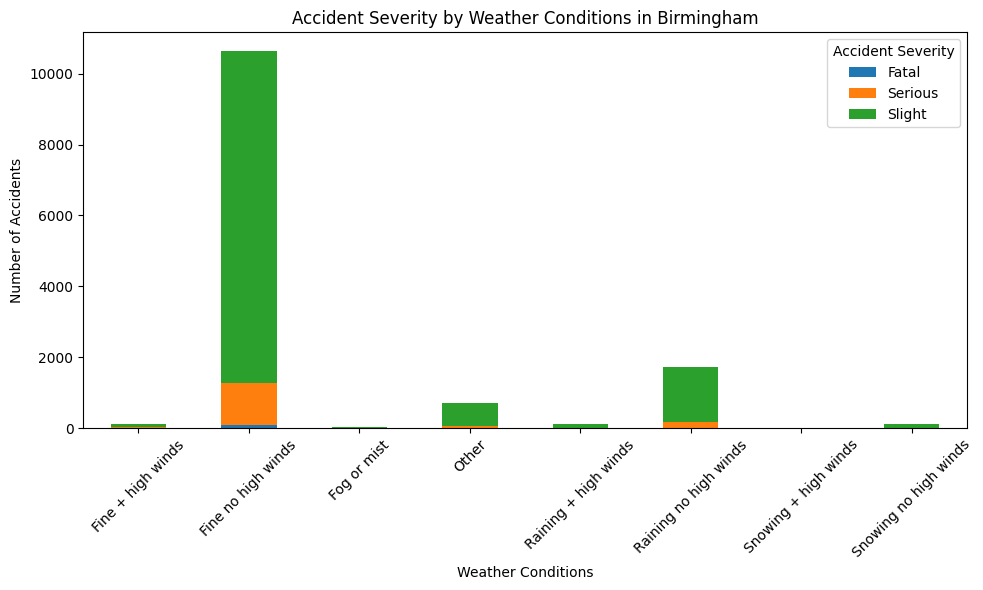

In [80]:
severity_weather = (
    birmingham_df.groupby(["Weather_Conditions", "Accident_Severity"])
    .size()
    .unstack(fill_value=0)
)

severity_weather.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6)
)

plt.title("Accident Severity by Weather Conditions in Birmingham")
plt.xlabel("Weather Conditions")
plt.ylabel("Number of Accidents")
plt.legend(title="Accident Severity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [116]:
birmingham_fatal = birmingham_df[birmingham_df['Accident_Severity'] == "Fatal"]
location_f = list(zip(birmingham_fatal['Latitude'], birmingham_fatal['Longitude']))
birmingham = folium.Map(location=[birmingham_fatal['Latitude'].mean(), birmingham_fatal['Longitude'].mean()], zoom_start=10)
HeatMap(location_f).add_to(birmingham)
birmingham

<h3>Insight: most accidents in Birmingham occur during "Fine no high winds" weather conditions. The majority of these accidents are classified as "Slight," indicating a lower severity. Fatal accidents are rare across all weather conditions.</h3>

<h1>2. How does accident frequency and severity vary by day of the week in Leeds?</h1>

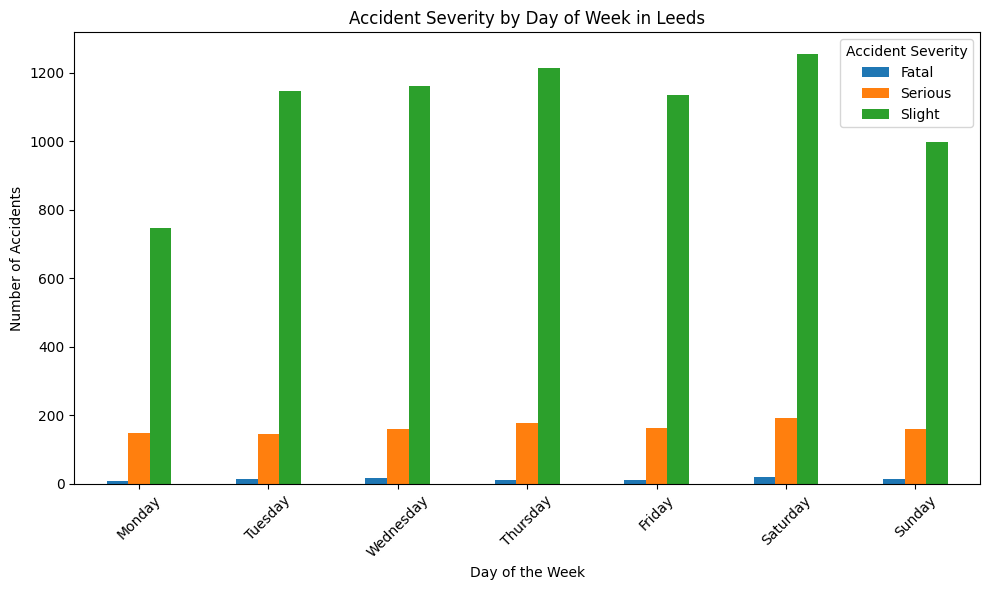

In [81]:
severity_day = (
    leeds_df.groupby(["DayOfWeek", "Accident_Severity"])
    .size()
    .unstack(fill_value=0)
)

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
severity_day = severity_day.reindex(days_order)

severity_day.plot(
    kind="bar",
    figsize=(10,6)
)

plt.title("Accident Severity by Day of Week in Leeds")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.legend(title="Accident Severity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [117]:
leeds_fatal = leeds_df[leeds_df['Accident_Severity'] == "Fatal"]
location_f = list(zip(leeds_fatal['Latitude'], leeds_fatal['Longitude']))
leeds = folium.Map(location=[leeds_fatal['Latitude'].mean(), leeds_fatal['Longitude'].mean()], zoom_start=10)
HeatMap(location_f).add_to(leeds)
leeds

<h3>Insight: accident frequency in Leeds is highest during the weekdays, particularly on Saturday, while it is lowest on Sunday. The vast majority of accidents across all days are of "Slight" severity, with "Serious" and "Fatal" accidents occurring much less frequently</h3>

<h1>3. How does accident severity vary by light conditions in Manchester?</h1>

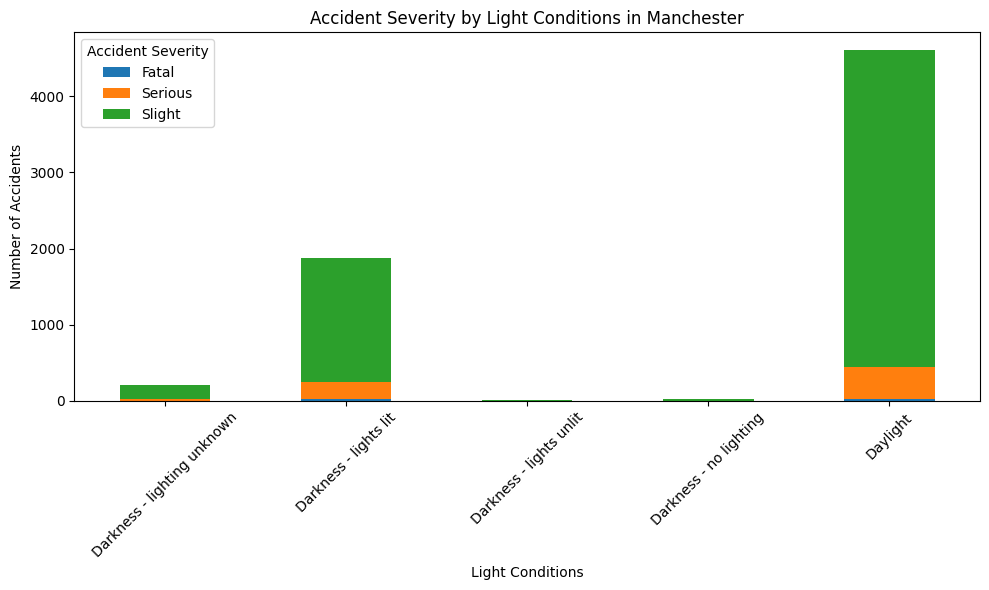

In [82]:
severity_light = (
    manchester_df.groupby(["Light_Conditions", "Accident_Severity"])
    .size()
    .unstack(fill_value=0)
)

severity_light.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6)
)

plt.title("Accident Severity by Light Conditions in Manchester")
plt.xlabel("Light Conditions")
plt.ylabel("Number of Accidents")
plt.legend(title="Accident Severity")
plt.xticks(rotation=45)
plt.tight_layout()


In [119]:
manchester_fatal = manchester_df[manchester_df['Accident_Severity'] == "Fatal"]
location_f = list(zip(manchester_fatal['Latitude'], manchester_fatal['Longitude']))
manchester = folium.Map(location=[manchester_fatal['Latitude'].mean(), manchester_fatal['Longitude'].mean()], zoom_start=10)
HeatMap(location_f).add_to(manchester)
manchester

<h3>The majority of accidents in Manchester occur during "Daylight" conditions, with a significant number also happening in "Darkness - lights lit". The vast majority of accidents under all light conditions are of "Slight" severity, with "Serious" and "Fatal" accidents being a small fraction of the total.</h3>

<h1>4. How did the number of accidents (by severity) change month by month in Bradford during 2020?”</h1>

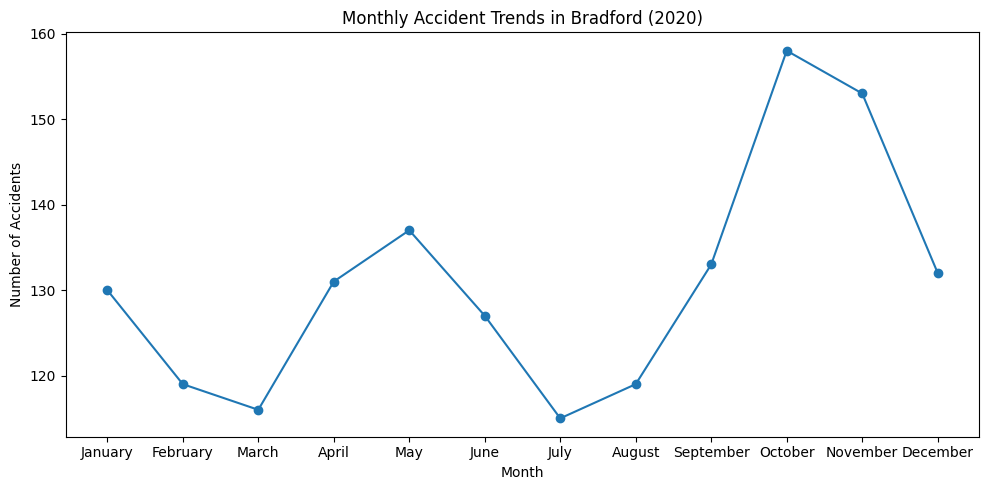

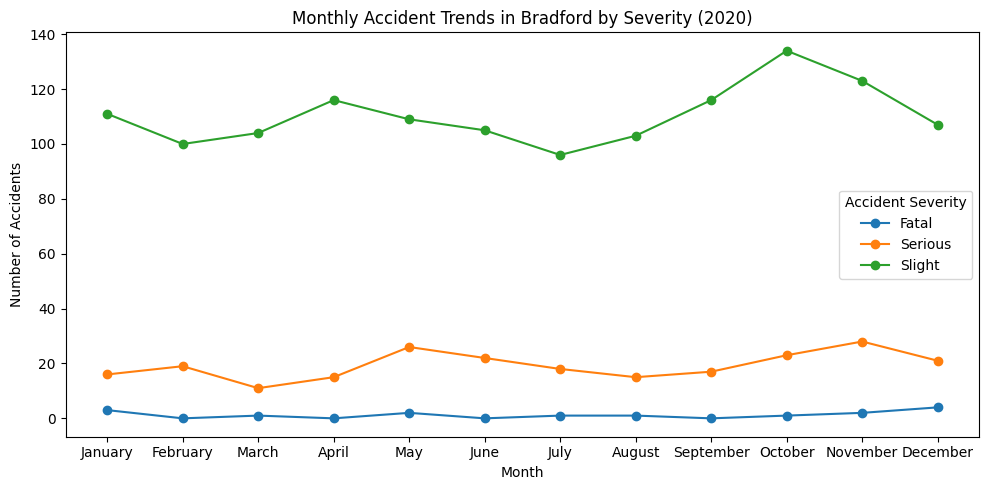

In [91]:
bradford_2020 = bradford_df[bradford_df["Year"] == 2020].copy()

month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

bradford_2020["Month"] = pd.Categorical(
    bradford_2020["Month"],
    categories=month_order,
    ordered=True
)

monthly_counts = (
    bradford_2020.groupby("Month")
    .size()
    .reset_index(name="Accident_Count")
)

plt.figure(figsize=(10,5))
plt.plot(monthly_counts["Month"], monthly_counts["Accident_Count"], marker="o")
plt.title("Monthly Accident Trends in Bradford (2020)")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


monthly_severity = (
    bradford_2020.groupby(["Month", "Accident_Severity"])
    .size()
    .reset_index(name="Accident_Count")
)

plt.figure(figsize=(10,5))
for severity in monthly_severity["Accident_Severity"].unique():
    subset = monthly_severity[monthly_severity["Accident_Severity"] == severity]
    plt.plot(subset["Month"], subset["Accident_Count"], marker="o", label=severity)

plt.title("Monthly Accident Trends in Bradford by Severity (2020)")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.legend(title="Accident Severity")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [121]:
bradford_fatal = bradford_df[bradford_df['Accident_Severity'] == "Fatal"]
location_f = list(zip(bradford_fatal['Latitude'], bradford_fatal['Longitude']))
bradford = folium.Map(location=[bradford_fatal['Latitude'].mean(), bradford_fatal['Longitude'].mean()], zoom_start=10)
HeatMap(location_f).add_to(bradford)
bradford

<h3>Insight: The number of accidents in Bradford during 2020 fluctuated, with a general increase from a low point in July to a peak in October. The vast majority of these incidents were consistently of "Slight" severity, while "Serious" and "Fatal" accidents remained at a consistently low level throughout the year.</h3>

<h1>5. What is the distribution of accidents by road surface conditions in Liverpool?</h1>

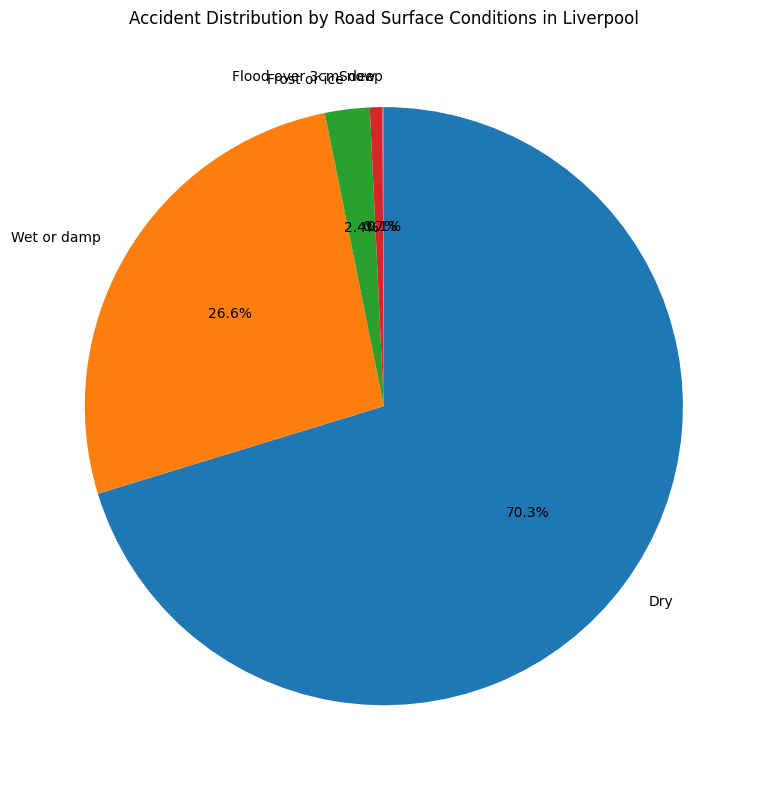

In [99]:
surface_counts = (
    liverpool_df["Road_Surface_Conditions"]
    .value_counts()
    .reset_index()
)
surface_counts.columns = ["Road_Surface_Conditions", "Accident_Count"]

plt.figure(figsize=(8,8))
plt.pie(
    surface_counts["Accident_Count"],
    labels=surface_counts["Road_Surface_Conditions"],
    autopct="%1.1f%%",   
    startangle=90,
    counterclock=False
)
plt.title("Accident Distribution by Road Surface Conditions in Liverpool")
plt.tight_layout()
plt.show()

In [122]:
liverpool_fatal = liverpool_df[liverpool_df['Accident_Severity'] == "Fatal"]
location_f = list(zip(liverpool_fatal['Latitude'], liverpool_fatal['Longitude']))
liverpool = folium.Map(location=[liverpool_fatal['Latitude'].mean(), liverpool_fatal['Longitude'].mean()], zoom_start=10)
HeatMap(location_f).add_to(liverpool)
liverpool

<h3>Insight: The vast majority of accidents in Liverpool occur on a "Dry" road surface, accounting for 70.3% of the total. "Wet or damp" conditions are the second-most common, representing 26.6% of accidents, while all other conditions are negligible.</h3>

<h1>6. What is the relationship between day of the week and hour of the day for accidents in Sheffield?</h1>

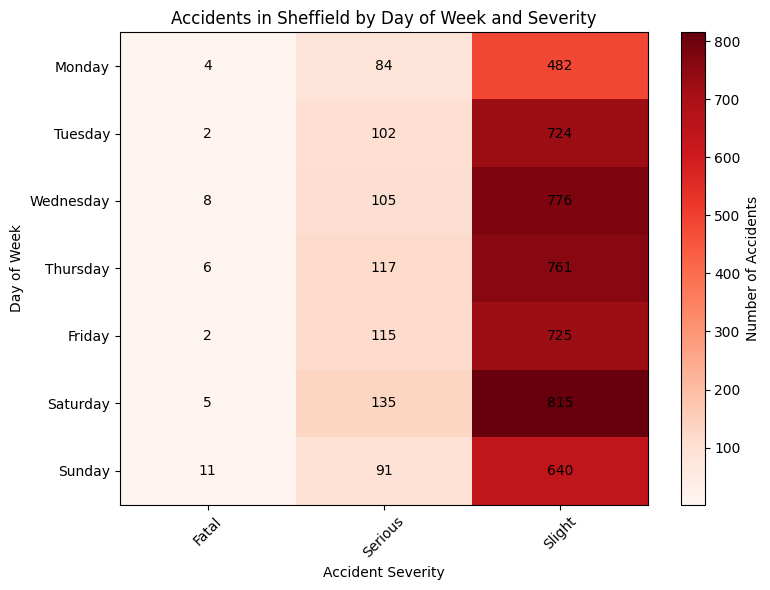

In [102]:

heat_data = (
    sheffield_df.groupby(["DayOfWeek", "Accident_Severity"])
    .size()
    .unstack(fill_value=0)
)

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heat_data = heat_data.reindex(days_order)

plt.figure(figsize=(8,6))
plt.imshow(heat_data, cmap="Reds", aspect="auto")

plt.xticks(ticks=range(len(heat_data.columns)), labels=heat_data.columns, rotation=45)
plt.yticks(ticks=range(len(heat_data.index)), labels=heat_data.index)
plt.xlabel("Accident Severity")
plt.ylabel("Day of Week")
plt.title("Accidents in Sheffield by Day of Week and Severity")

for i in range(len(heat_data.index)):
    for j in range(len(heat_data.columns)):
        plt.text(j, i, heat_data.iloc[i, j], ha="center", va="center", color="black")

plt.colorbar(label="Number of Accidents")
plt.tight_layout()
plt.show()


In [123]:
sheffield_fatal = sheffield_df[sheffield_df['Accident_Severity'] == "Fatal"]
location_f = list(zip(sheffield_fatal['Latitude'], sheffield_fatal['Longitude']))
sheffield = folium.Map(location=[sheffield_fatal['Latitude'].mean(), sheffield_fatal['Longitude'].mean()], zoom_start=10)
HeatMap(location_f).add_to(sheffield)
sheffield

<h3>Insight: Accident frequency in Sheffield is highest on Saturday and Friday for "Slight" and "Serious" accidents. The vast majority of accidents are of "Slight" severity, while "Fatal" and "Serious" accidents are a small fraction of the total, with "Fatal" accidents being least frequent on Tuesday and Friday and most frequent on Sunday.</h3>